# Preliminary Visualization: Sample Data

Note that you may have to download a package called basemap. This can easily be done by running 'conda install basemap'. It also installs the necessary dependencies.

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import os

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

**Tangent**: Interesting visualization on New York traffic:
    http://www.wired.com/2010/05/ff_komanoff_traffic/

#### Columns (Portuguese to English)
    Contem data do evento --> date of event (edate)
    Data do AVL, --> date of AVL (avldate)
    Codigo de linha AVL --> AVL line code (lc)
    Latitude --> lat
    Longitude --> lon
    Identificador AVL --> identifier AVL (avlid)


In [172]:
rawdf = pd.read_csv('raw_data/registro-de-posicao-a-data.csv', header=None, names=['Event Date', 'AVL Date', 'Line Code', 'lat', 'lon', 'Identifier'])
rawdf.head(190000)

,Event Date,AVL Date,Line Code,lat,lon,Identifier
0,2013-08-24 18:59:34.803,2013-08-24 18:16:19.000,34766,-23.736918,-46.776485,41292
1,2013-08-24 18:59:34.790,2013-08-24 00:35:59.000,1428,-23.538513,-46.753928,14518
2,2013-08-24 18:59:34.820,2013-08-24 18:48:57.000,33146,-23.535275,-46.582367,35389
3,2013-08-24 18:59:34.837,2013-08-24 00:34:10.000,1663,-23.639893,-46.601290,11145
4,2013-08-24 18:59:34.843,2013-08-24 00:34:23.000,1354,-23.541658,-46.510520,55986
5,2013-08-24 18:59:34.850,2013-08-24 18:58:27.000,33269,-23.536080,-46.714063,38308
6,2013-08-24 18:59:34.853,2013-08-24 00:36:55.000,33079,-23.574140,-46.451775,10879
7,2013-08-24 18:59:34.857,2013-08-24 12:39:22.000,813,-23.501870,-46.694792,55309
8,2013-08-24 18:59:34.870,2013-08-24 00:34:06.000,34137,-23.487730,-46.682733,13122
9,2013-08-24 18:59:34.877,2013-08-24 00:32:34.000,1441,-23.739662,-46.702210,11441


### How big is the dataset?
Quick cleaning for invalid lat/lon data. Some have coordinates of (0,0).

In [141]:
print rawdf.shape
df = rawdf[rawdf.lat < 0]
df = df.reset_index(drop=True) # update after dropped rows
df.shape

(200000, 6)


(193907, 6)

#### Is the identifier column unique? What does it represent?

The identifier column most likely identifies a bus.

In [161]:
dflc = df.groupby('Line Code')
dflc.count()[:10]

,Event Date,AVL Date,lat,lon,Identifier
Line Code,,,,,
1,103,103,103,103,103
4,526,526,526,526,526
5,53,53,53,53,53
6,63,63,63,63,63
8,313,313,313,313,313
9,4,4,4,4,4
10,5,5,5,5,5
11,5,5,5,5,5
12,25,25,25,25,25


In [143]:
len(df['Identifier'].unique())

13470

In [144]:
len(df['Line Code'].unique())

2173

### Lat/Lon Plot of AVL Data

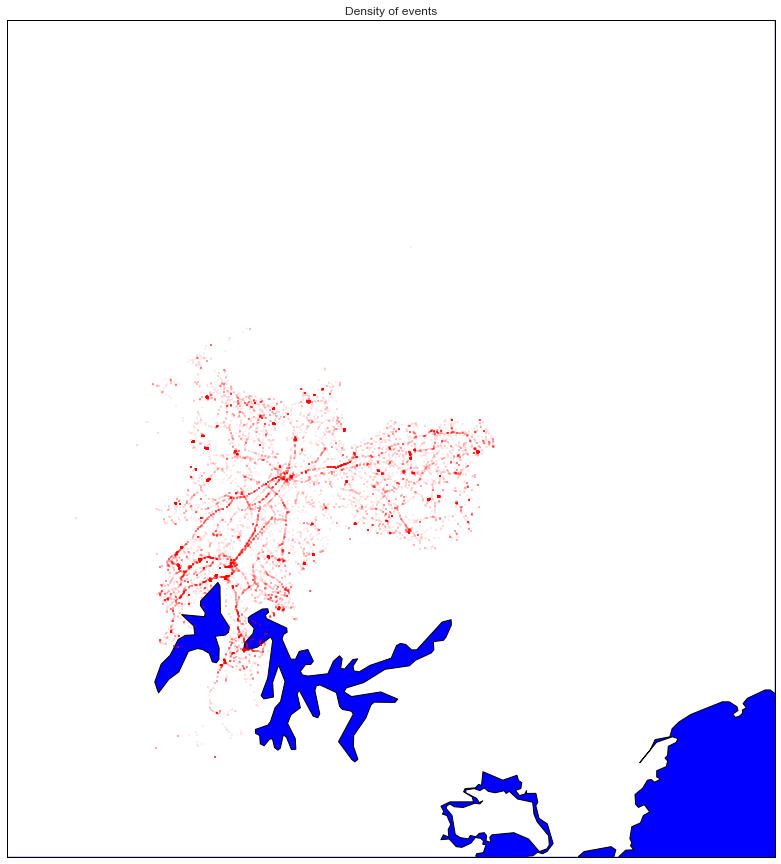

In [164]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(30000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.4)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()

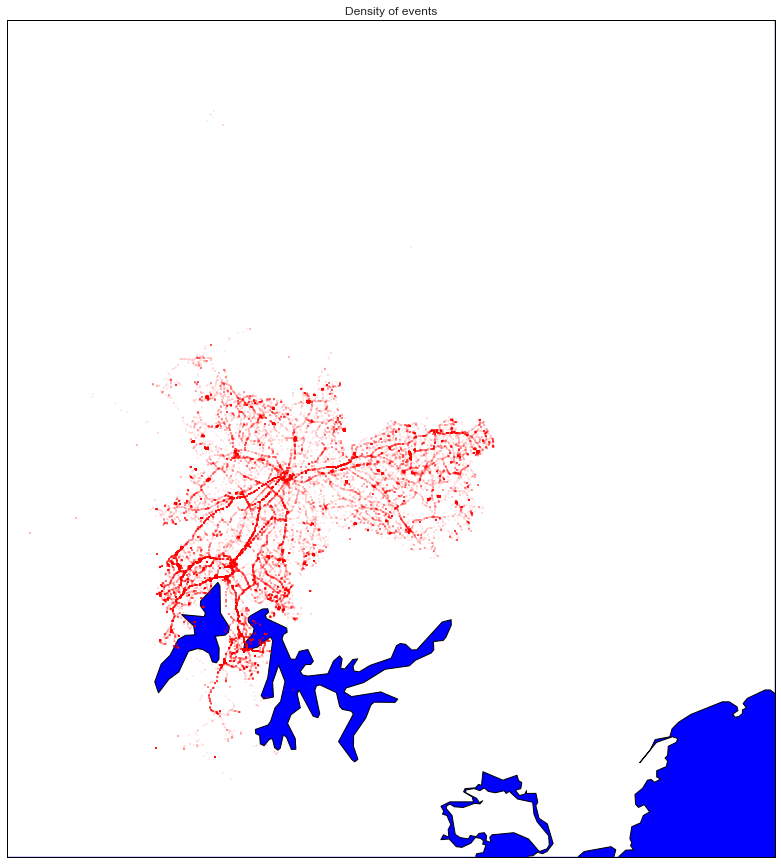

In [166]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(100000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.4)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()

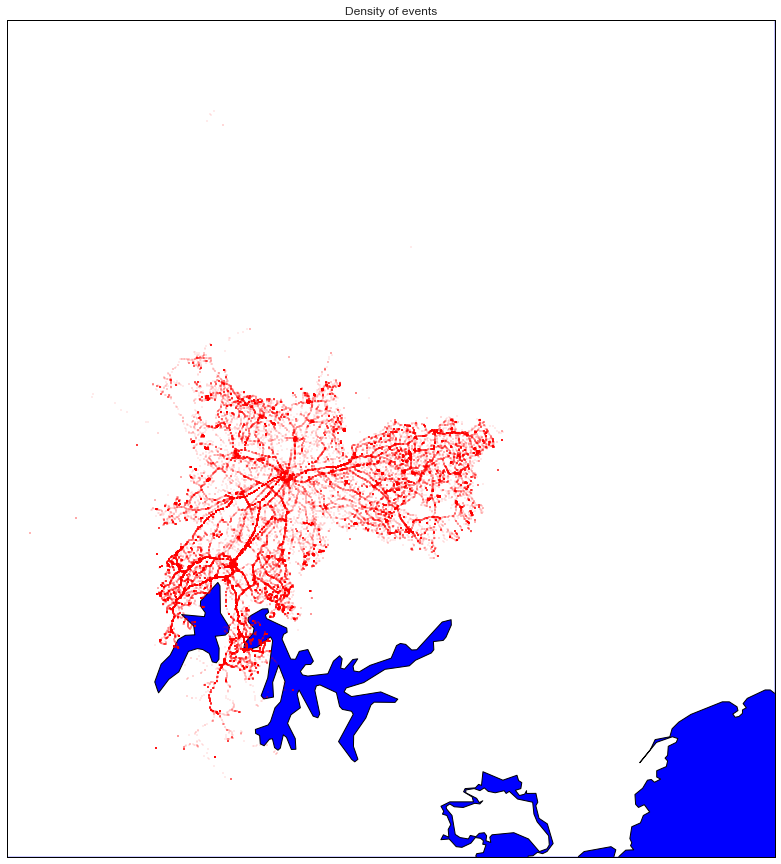

In [167]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(190000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.4)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()

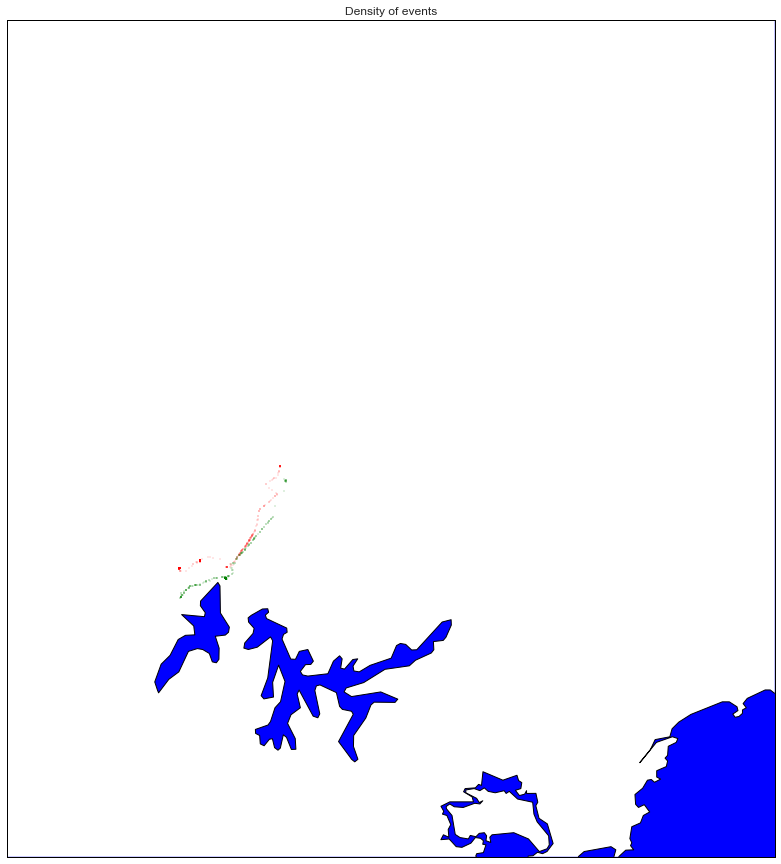

In [162]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(df.shape[0]):
    if df['Line Code'][x] == 4:
        m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.5)
    if df['Line Code'][x] == 171:
        m.plot(df.lon[x],df.lat[x],'gD',latlon=True,ms=1,alpha=.5)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()